In [3]:
!pip install echosms

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import echosms

## Reference models and benchmark data

EchoSMS contains the model parameters and benchmark results from the Jech et al. (2015) paper. These are a useful set of model parameters for testing models against. There are also some other useful model parameters.

In [5]:
ref = echosms.ReferenceModels()
ref.names()

['fixed rigid sphere',
 'pressure release sphere',
 'gas filled sphere',
 'weakly scattering sphere',
 'spherical fluid shell with pressure release interior',
 'spherical fluid shell with gas interior',
 'spherical fluid shell with weakly scattering interior',
 'fixed rigid prolate spheroid',
 'pressure release prolate spheroid',
 'gas filled prolate spheroid',
 'weakly scattering prolate spheroid',
 'fixed rigid finite cylinder',
 'pressure release finite cylinder',
 'gas filled finite cylinder',
 'weakly scattering finite cylinder',
 'WC20 calibration sphere',
 'WC21 calibration sphere',
 'WC22 calibration sphere',
 'WC25 calibration sphere',
 'WC38.1 calibration sphere',
 'WC57.2 calibration sphere',
 'WC60 calibration sphere',
 'WC64 calibration sphere',
 'Cu10.3 calibration sphere',
 'Cu13.7 calibration sphere',
 'Cu23 calibration sphere',
 'Cu32 calibration sphere',
 'Cu32.1 calibration sphere',
 'Cu42 calibration sphere',
 'Cu45 calibration sphere',
 'Cu60 calibration sphere',
 

The specificiations for each of these models are available:

In [6]:
ref.specification('weakly scattering sphere')

{'name': 'weakly scattering sphere',
 'shape': 'sphere',
 'boundary_type': 'fluid filled',
 'description': 'A sphere with a fluid-filled interior with similar density and sound speed to the surrounding medium',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.3,
 'target_rho': 1028.9,
 'target_c': 1480.3,
 'source': 'https://doi.org/10.1121/1.4937607',
 'benchmark_model': 'mss'}

## Running a model

A model that simulates a weakly scattering sphere is the Modal Series Solution model, which was used in the Jech paper as the benchmark model for weakly scattering spheres. That model can be run on the specification like this:

In [32]:
model = echosms.MSSModel()
parameters = ref.parameters('weakly scattering sphere')
parameters

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.3,
 'target_rho': 1028.9,
 'target_c': 1480.3}

The documentation for the MSS model shows that a 'f' parameter is also needed, so add that:

In [8]:
parameters['f'] = 38000

And then the model can be run with those parameters

In [9]:
model.calculate_ts(parameters)

[-94.13445487634077]

Multiple sets of parameters can be run with one call:

In [33]:
parameters['f'] = range(1000, 400000, 500)
ts = model.calculate_ts(parameters, progress=True)

mss: 100%|██████████ [798/798; 815.04 models/s]


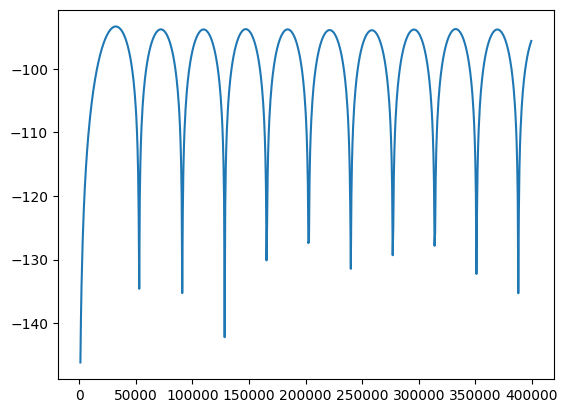

In [11]:
plt.plot(parameters['f'], ts)

And how does that compare to the results in Jech et al?. Those data are also in echoSMs:

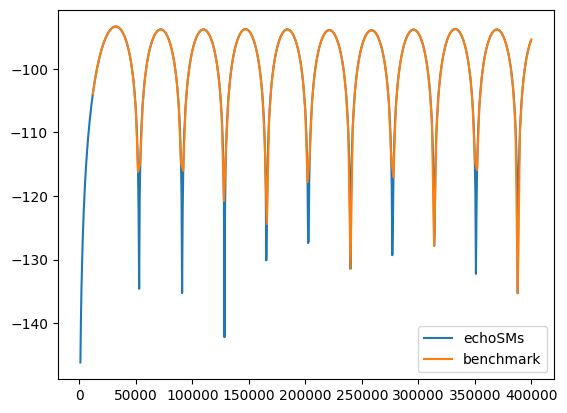

In [12]:
bm_f, bm_ts = echosms.BenchmarkData().freq_data('weakly scattering sphere')
plt.plot(parameters['f'], ts, bm_f, bm_ts)
plt.legend(['echoSMs', 'benchmark'])

Sometimes one wants to run the model with multiple combinations of parameters. This is easily done:

In [44]:
parameters['a'] = np.linspace(0.001, 0.025, 100)
parameters['f'] = np.linspace(10, 200, 100)*1e3
parameters

{'boundary_type': 'fluid filled',
 'a': array([0.001     , 0.00124242, 0.00148485, 0.00172727, 0.0019697 ,
        0.00221212, 0.00245455, 0.00269697, 0.00293939, 0.00318182,
        0.00342424, 0.00366667, 0.00390909, 0.00415152, 0.00439394,
        0.00463636, 0.00487879, 0.00512121, 0.00536364, 0.00560606,
        0.00584848, 0.00609091, 0.00633333, 0.00657576, 0.00681818,
        0.00706061, 0.00730303, 0.00754545, 0.00778788, 0.0080303 ,
        0.00827273, 0.00851515, 0.00875758, 0.009     , 0.00924242,
        0.00948485, 0.00972727, 0.0099697 , 0.01021212, 0.01045455,
        0.01069697, 0.01093939, 0.01118182, 0.01142424, 0.01166667,
        0.01190909, 0.01215152, 0.01239394, 0.01263636, 0.01287879,
        0.01312121, 0.01336364, 0.01360606, 0.01384848, 0.01409091,
        0.01433333, 0.01457576, 0.01481818, 0.01506061, 0.01530303,
        0.01554545, 0.01578788, 0.0160303 , 0.01627273, 0.01651515,
        0.01675758, 0.017     , 0.01724242, 0.01748485, 0.01772727,
        0

In [45]:
data = echosms.as_dataarray(parameters)
ts = model.calculate_ts(data, progress=True, multiprocess=True, expand=True)

  0%|          | 0/16 [00:00<?, ?it/s]

In [46]:
data['f'] = data.f/1e3

These data are nicer plotted as an image:

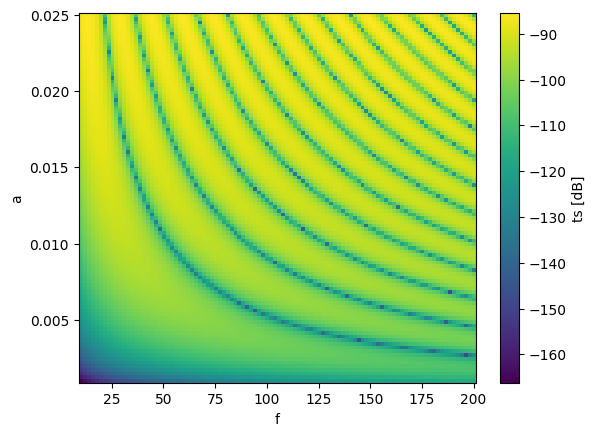

In [47]:
xr.plot.pcolormesh(data.squeeze(drop=True))

For convenience, the model definitions for all known calibration spheres is in echoSMs

In [17]:
ref.names()

['fixed rigid sphere',
 'pressure release sphere',
 'gas filled sphere',
 'weakly scattering sphere',
 'spherical fluid shell with pressure release interior',
 'spherical fluid shell with gas interior',
 'spherical fluid shell with weakly scattering interior',
 'fixed rigid prolate spheroid',
 'pressure release prolate spheroid',
 'gas filled prolate spheroid',
 'weakly scattering prolate spheroid',
 'fixed rigid finite cylinder',
 'pressure release finite cylinder',
 'gas filled finite cylinder',
 'weakly scattering finite cylinder',
 'WC20 calibration sphere',
 'WC21 calibration sphere',
 'WC22 calibration sphere',
 'WC25 calibration sphere',
 'WC38.1 calibration sphere',
 'WC57.2 calibration sphere',
 'WC60 calibration sphere',
 'WC64 calibration sphere',
 'Cu10.3 calibration sphere',
 'Cu13.7 calibration sphere',
 'Cu23 calibration sphere',
 'Cu32 calibration sphere',
 'Cu32.1 calibration sphere',
 'Cu42 calibration sphere',
 'Cu45 calibration sphere',
 'Cu60 calibration sphere',
 

In [18]:
wc381 = ref.parameters('WC38.1 calibration sphere')
wc381['f'] = np.linspace(55, 100, 100)*1e3
wc381

{'boundary_type': 'elastic',
 'a': 0.01905,
 'medium_rho': 1026.8,
 'medium_c': 1477.3,
 'target_rho': 14900,
 'target_longitudinal_c': 6853,
 'target_transverse_c': 4171,
 'f': array([ 55000.        ,  55454.54545455,  55909.09090909,  56363.63636364,
         56818.18181818,  57272.72727273,  57727.27272727,  58181.81818182,
         58636.36363636,  59090.90909091,  59545.45454545,  60000.        ,
         60454.54545455,  60909.09090909,  61363.63636364,  61818.18181818,
         62272.72727273,  62727.27272727,  63181.81818182,  63636.36363636,
         64090.90909091,  64545.45454545,  65000.        ,  65454.54545455,
         65909.09090909,  66363.63636364,  66818.18181818,  67272.72727273,
         67727.27272727,  68181.81818182,  68636.36363636,  69090.90909091,
         69545.45454545,  70000.        ,  70454.54545455,  70909.09090909,
         71363.63636364,  71818.18181818,  72272.72727273,  72727.27272727,
         73181.81818182,  73636.36363636,  74090.90909091,  745

es: 100%|██████████ [100/100; 843.19 models/s]


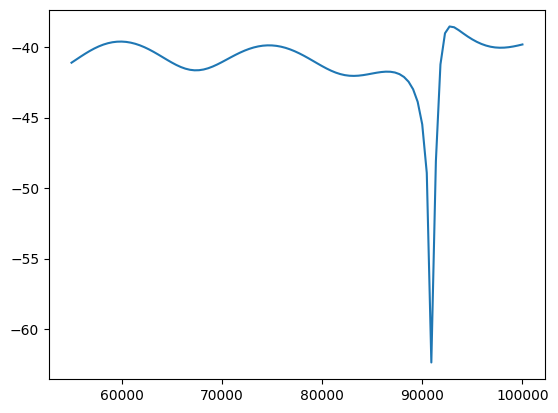

In [19]:
model = echosms.ESModel()
ts = model.calculate_ts(wc381, progress=True)
plt.plot(wc381['f'], ts)

## Historical organism shapes

EchoSMs also contains other fish model data - with the aim of making access to historical datasets more widely available and to enable testing of new model implementations. The example below shows the Clay & Horne KRM cod TS model. EchoSMs also contains similar model data for some published DWBA models. These data have all come from publically-available datasets and are collected in echoSMs to provide a single convenient place to access these data.

In [20]:
echosms.KRMdata().names()

['Sardine',
 'Cod',
 'Bocaccio',
 'LargemouthBass_620',
 'LargemouthBass_620_Lateral',
 'LargemouthBass_627',
 'LargemouthBass_627_Lateral',
 'StripedBass_205',
 'StripedBass_205_Lateral',
 'StripedBass_628',
 'StripedBass_628_Lateral',
 'ChannelCatfish_1086',
 'ChannelCatfish_1086_Lateral',
 'WhiteCatfish_185',
 'WhiteCatfish_185_Lateral',
 'BlackCrappie_236',
 'BlackCrappie_236_Lateral',
 'Sandfish_200_Female',
 'Sandfish_175_Male',
 'Corvina_20140317_001_Broadside',
 'Corvina_20140317_008_Broadside',
 'Corvina_20140331_003_Broadside',
 'Corvina_20140331_005_Broadside',
 'Corvina_20140331_008_Broadside',
 'AtlanticMackerel_26.94cm',
 'AtlanticMackerel_backbone_26.94cm',
 'AtlanticMackerel_backboneSkull_26.94cm',
 'AtlanticMackerel_19.52cm',
 'AtlanticMackerel_backbone_19.52cm',
 'AtlanticMackerel_backboneSkull_19.52cm',
 'SkipjackTuna_46.54cm',
 'SkipjackTuna_backbone_46.54cm',
 'SkipjackTuna_backboneSkull_46.54cm',
 'SkipjackTuna_41.18cm',
 'SkipjackTuna_backbone_41.18cm',
 'Skipjac

The cod shape is what was used in the Clay & Horne paper:

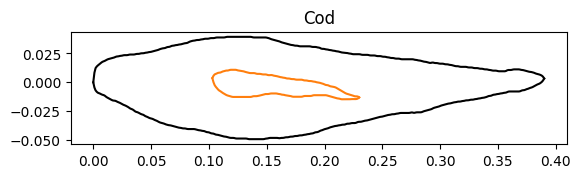

In [21]:
cod = echosms.KRMdata().model('Cod')
cod.plot()

The echoSMs implementation of the KRM model can be run using these shape data:

In [22]:
p = {'medium_c': 1490, 'medium_rho': 1030, 'organism': cod, 'theta': 90,
         'f': np.arange(12, 121, .1)*1e3}

In [23]:
model = echosms.KRMModel()
krm_ts = model.calculate_ts(p)

Text(0, 0.5, 'TS')

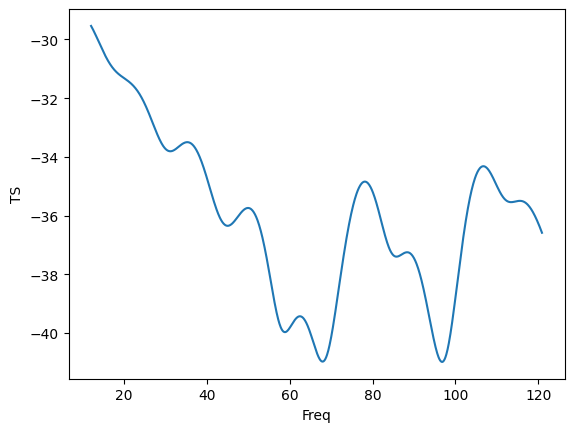

In [24]:
plt.plot(p['f']/1e3, krm_ts)
plt.xlabel('Freq')
plt.ylabel('TS')

The DWBA models in echoSMs are

In [25]:
echosms.DWBAdata().names()

['Daphnia',
 'Daphnia2',
 'Generic acartia',
 'Generic krill (Conti 2006)',
 'Generic krill (McGehee 1998)',
 'Nauplius',
 'Sandeel']

In [26]:
krill = echosms.DWBAdata().model('Generic krill (McGehee 1998)')

In [27]:
krill.source


'https://doi.org/10.1016/S0967-0645(98)00036-8'

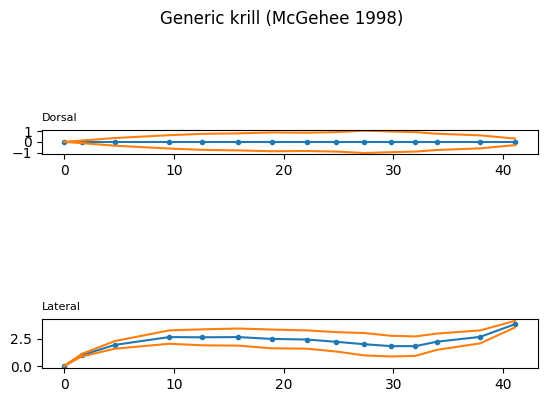

In [28]:

krill.plot()